Testing Different Regression methods for stock price prediction

Linear Regression: can capture linear trends and patterns in historical data

In [209]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
import yfinance as yf

In [210]:
# download, preprocess and show data
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
data.dropna(inplace=True)
print(data.head())

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_4480\909656030.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.468262  72.528582  71.223259  71.476600  135480400
2020-01-03  71.763725  72.523754  71.539337  71.696167  146322800
2020-01-06  72.335556  72.374162  70.634539  70.885472  118387200
2020-01-07  71.995346  72.600952  71.775781  72.345197  108872000
2020-01-08  73.153496  73.455095  71.698581  71.698581  132079200


In [211]:
# Features Selected: Open, High, Low, Volume and Moving Averages
# Feature Engineering: we'll create 20 and 50 day moving averages to improve model's performance

data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data.dropna(inplace=True)
print(data.head())

Price           Close       High        Low       Open     Volume     SMA_20  \
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL              
Date                                                                           
2020-03-13  67.227592  67.699207  61.176455  64.064172  370732000  70.773997   
2020-03-16  58.578979  62.659018  58.044485  58.516096  322423600  69.773455   
2020-03-17  61.154701  62.303495  57.657519  59.860791  324056000  68.973650   
2020-03-18  59.657631  60.462999  57.347944  57.988854  300233600  68.043124   
2020-03-19  59.200542  61.149869  58.675724  59.831776  271857200  67.129893   

Price          SMA_50  
Ticker                 
Date                   
2020-03-13  73.870378  
2020-03-16  73.592592  
2020-03-17  73.380411  
2020-03-18  73.126853  
2020-03-19  72.870957  


In [212]:
# Use train_test_split from sklearn.model_selection to split the data into training and testing sets

# X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_50']]

X = data[['Open', 'High', 'Low', 'Volume']]
Y = data[['Close']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


# Then, train the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Next, we will evaluate its performance using the testing data
Y_pred = model.predict(X_test)
MSE = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {MSE}")
print(f"R-Squared: {r2}")

# Low MSE and high R-squared indicate a better fit

Mean Squared Error: 0.9624616387275746
R-Squared: 0.9987652998797052


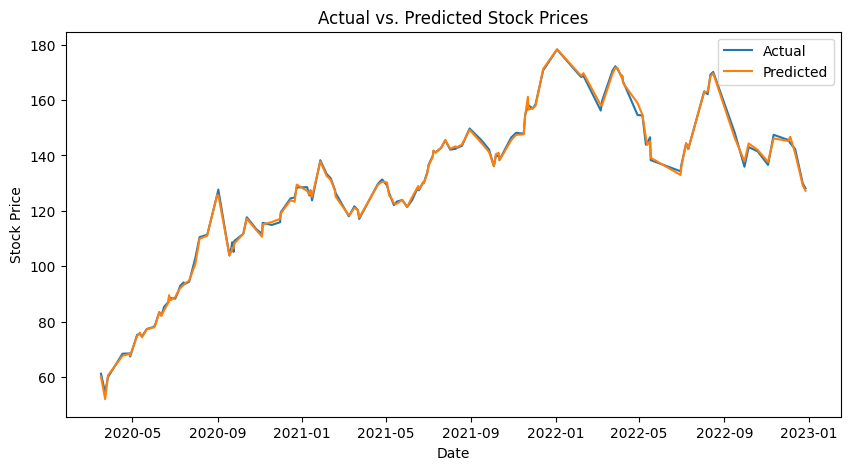

In [213]:
Y_pred = pd.Series(Y_pred.flatten(), index=Y_test.index)
Y_pred = Y_pred.sort_index()
Y_test = Y_test.sort_index()

plt.figure(figsize=(10, 5))
plt.plot(Y_test.index, Y_test, label="Actual")
plt.plot(Y_pred.index, Y_pred, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.show()

Next, we will move onto Ridge Regression
- Used to handle multicollinearity in data (when two predictor variables in a regression model are highly correlated)
- This can lead to unstable and unreliable estimates of the regression coefficients, as well as overfitting

Workaround: Add a penalty term, to shrink coefficients towards zero, which has the effect of reducing variance

- Required specifying a hyperparameters, which controls the strength of the penalty term (can be tuned using cross-validation and other techniques)

- used when number of predictors is greater than number of observations, and when we want to make predictions rather than to understand the relationship between predictor and response

In [214]:
from sklearn.linear_model import Ridge

data_ridge = yf.download('AAPL', start="2020-01-01", end="2023-01-01")
X = data_ridge[['Open', 'High', 'Low', 'Volume']]
Y = data_ridge['Close']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1)
ridge.fit(X_train, Y_train)

Y_pred_ridge = ridge.predict(X_test)
MSE_ridge = mean_squared_error(Y_test, Y_pred_ridge)
print(f"Mean Squared Error: {MSE_ridge}")

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_4480\3973093388.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_ridge = yf.download('AAPL', start="2020-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

Mean Squared Error: 1.0222213199557981


Finally, we will discuss Lasso Regression

Pros
- Can perform feature selection by shrinking the coefficients of less important features to zero
- Can handle high-dimensional data, where the number of features is greater than the number of observations
- In can in turn, improve the interpretability of a model

Cons
- may not perform well if there is high multicollinearity
- can be sensitive to outliers in the data
- may not be able to select the "correct" set of predictors

When it can be used in finance
- when there is high correlation between predictors, such as interest rates, inflation rates and GDP growth rates

In [215]:
from sklearn.linear_model import Lasso

data_lasso = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
print(data_lasso.head())

X = data_lasso[['Open', 'High', 'Low', 'Volume']]
Y = data_lasso[['Close']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, Y_train)

Y_pred_lasso = lasso.predict(X_test)

MSE_lasso = mean_squared_error(Y_test, Y_pred_lasso)

print(f"Mean Squared Error: {MSE_lasso}")

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_4480\1755285366.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_lasso = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.468262  72.528582  71.223259  71.476600  135480400
2020-01-03  71.763725  72.523754  71.539337  71.696167  146322800
2020-01-06  72.335556  72.374162  70.634539  70.885472  118387200
2020-01-07  71.995346  72.600952  71.775781  72.345197  108872000
2020-01-08  73.153496  73.455095  71.698581  71.698581  132079200
Mean Squared Error: 1.2290983846271855



C:\Users\Jonathan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.283e+02, tolerance: 5.437e+01
  model = cd_fast.enet_coordinate_descent(
